# Visualizations of Spotify Audio Feature and Play Data of The National

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [2]:
studio_albums_df = pd.read_csv("National_studio_albums.csv")

studio_albums_df.head()

,album,track_number,name,uri,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,...,speechiness,tempo,valence,key,time_signature,popularity,album_order,release_date,plays,relative plays per album
0,The National,1,Beautiful Head,spotify:track:5qjxbESLSYtV20JKeiwsaZ,188400,0.5470,0.564,0.667,0.04300,0.0959,...,0.0529,148.091,0.546,4,4,27,0,2001-07-03,1281845,9.490054
1,The National,2,Cold Girl Fever,spotify:track:77JYrFDjiqBSUQ6qMLfhaL,246000,0.7560,0.788,0.392,0.75900,0.1070,...,0.0432,118.013,0.573,9,4,40,0,2001-07-03,3088937,22.868739
2,The National,3,The Perfect Song,spotify:track:1cZnwa4gquHoJ6jTIAYAkg,195200,0.0268,0.541,0.521,0.28100,0.0913,...,0.0313,125.675,0.480,7,4,28,0,2001-07-03,1218489,9.021002
3,The National,4,American Mary,spotify:track:1IGBD3TlzViHUHb1FKeEHz,242893,0.5630,0.642,0.318,0.00643,0.0939,...,0.0268,135.867,0.336,7,4,26,0,2001-07-03,1157692,8.570895
4,The National,5,Son,spotify:track:2qNifuc2Z75HavDfBpCuGf,319733,0.0532,0.762,0.480,0.69300,0.0800,...,0.0303,125.025,0.305,0,4,25,0,2001-07-03,997193,7.382652


In [3]:
studio_albums = ['The National',
                'Sad Songs for Dirty Lovers',
                'Alligator',
                'Boxer',
                'High Violet',
                'Trouble Will Find Me',
                'Sleep Well Beast',
                'I Am Easy to Find']

In [4]:
# colors from https://matplotlib.org/stable/gallery/color/named_colors.html

album_palette = {
    'The National': 'deepskyblue',
    'Sad Songs for Dirty Lovers': 'darkorange',
    'Alligator': 'green',
    'Boxer': 'yellow',
    'High Violet': 'blueviolet',
    'Trouble Will Find Me': 'slategrey',
    'Sleep Well Beast': 'blue',
    'I Am Easy to Find': 'pink'}

In [5]:
# groupby album and calculate sums for features

album_sums = studio_albums_df.groupby('album').sum() \
            .drop(columns = ['track_number', 
                             'key', 
                             'time_signature', 
                             'album_order', 
                             'relative plays per album'])

In [6]:
album_sums

,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,plays
album,,,,,,,,,,,,
Alligator,2885302,3.694712,6.788,9.630,3.115712,1.6350,-88.616,0.4626,1625.693,6.9658,507,66112718
Boxer,2585704,5.149070,6.297,7.455,9.487000,1.5615,-102.861,0.3774,1544.000,5.5010,455,159027590
High Violet,2859650,5.490800,5.686,7.859,6.269115,1.2917,-86.832,0.4777,1374.205,4.9050,417,225743486
I Am Easy to Find,3824436,9.992400,8.076,8.837,6.072802,1.8597,-158.893,0.8620,1901.716,4.0739,703,133553721
Sad Songs for Dirty Lovers,2699649,4.102499,6.097,6.921,6.257206,1.8717,-99.067,0.4395,1561.017,4.5330,355,22658750
Sleep Well Beast,3466116,6.209260,6.497,8.355,9.261000,2.1066,-111.428,0.9772,1540.818,4.0600,555,189562003
The National,2636557,4.071112,7.646,5.575,3.666830,1.7894,-135.766,0.5906,1479.841,4.8034,314,13507247
Trouble Will Find Me,3307347,7.244000,6.332,7.914,3.632287,1.4638,-114.482,0.6043,1826.172,3.6510,650,412567899


### Total Plays and Popularity by Album

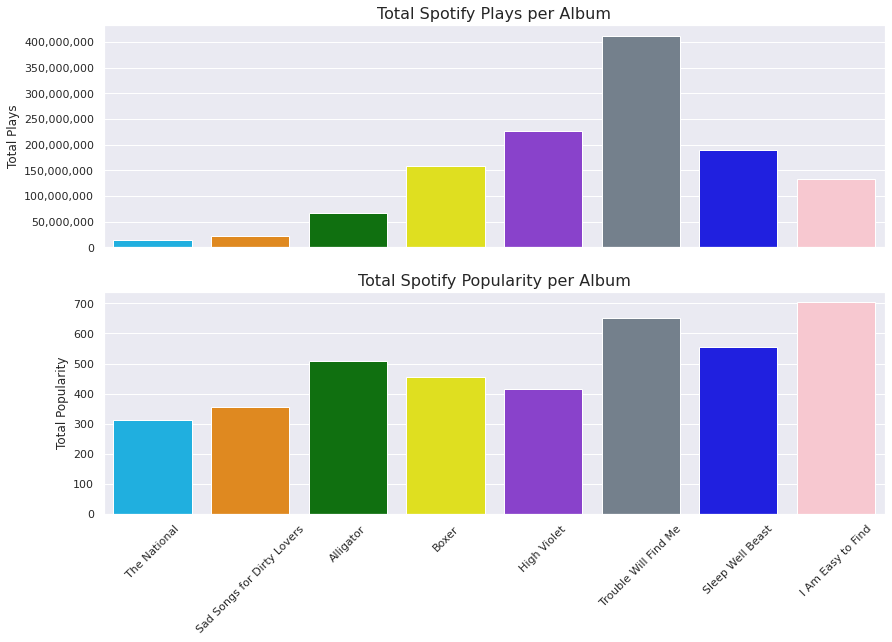

In [7]:
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows = 2,
                               ncols = 1,
                               sharex = True,
                               figsize = (14,9))

# Total Spotify Plays per Album
total_album_plays = sns.barplot(data = album_sums,
                                x = album_sums.index,
                                y = 'plays',
                                order = studio_albums,
                                palette = album_palette,
                                ax = ax1)

# change y ticks from scientific notation to normal notation w/ commas
ylabels = ['{:,.0f}'.format(y) for y in total_album_plays.axes.get_yticks()]
ticks_loc = total_album_plays.get_yticks().tolist()
total_album_plays.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
total_album_plays.set_yticklabels(ylabels)

total_album_plays.set_xlabel("")
total_album_plays.set_ylabel("Total Plays")
total_album_plays.set_title("Total Spotify Plays per Album", fontsize = 16)


# Total Spotify Popularity per Album
total_album_pop = sns.barplot(data = album_sums,
                              x = album_sums.index,
                              y = 'popularity',
                              order = studio_albums,
                              palette = album_palette,
                              ax = ax2)

total_album_pop.set_xticklabels(total_album_pop.get_xticklabels(), 
                                rotation = 45, 
                                ha = 'center')

total_album_pop.set_xlabel("")
total_album_pop.set_ylabel("Total Popularity")
total_album_pop.set_title("Total Spotify Popularity per Album", fontsize = 16);

The album "Trouble Will Find Me" dominates the Total Spotify Plays, mainly due to the track of "I Need My Girl" with 116,835,485 plays.

When looking at Total Spotify Popularity, the album "Alligator" has a higher total popularity than Boxer and High Violet, despite the lower Total Plays. "I Am Easy to Find" is the most popular album, likely due to how Popularity incorporates the number of recent plays and that IAETF is the most recently released album.

### Album and Track Plays, Popularity, and Relative Popularity

In [8]:
# make a dataframe with only the numeric audio features
numeric_features = ["duration_ms",
                    "acousticness",
                    "danceability",
                    "liveness",
                    "loudness",
                    "speechiness",
                    "tempo",
                    "valence",
                    "popularity",
                    "plays",
                    "relative plays per album",
                    "album"]

numeric_features_df = studio_albums_df[numeric_features]

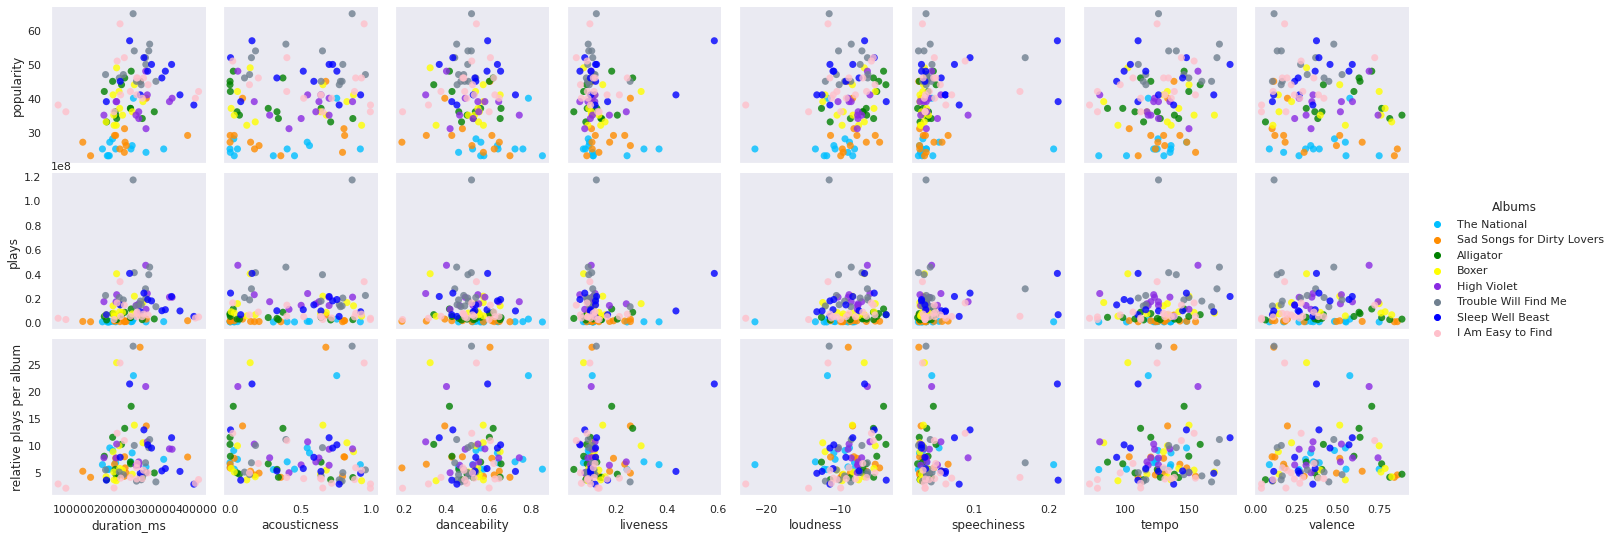

In [9]:
sns.set(style = "dark")

x_feat = ["duration_ms",
          "acousticness",
          "danceability",
          "liveness",
          "loudness",
          "speechiness",
          "tempo",
          "valence"]

y_feat = ["popularity",
          "plays",
          "relative plays per album"]

feature_pg = sns.PairGrid(data = numeric_features_df,
                          hue = 'album',
                          palette = album_palette,
                          x_vars = x_feat,
                          y_vars = y_feat,
                          layout_pad = 0)

feature_pg.map_offdiag(sns.scatterplot, s = 50, edgecolor = "none", alpha = .8)
feature_pg.add_legend(title = "Albums");

Scatter plots do not show an obvious correlation or strong patterns between a specific audio features with the number of plays or popularity of a given track

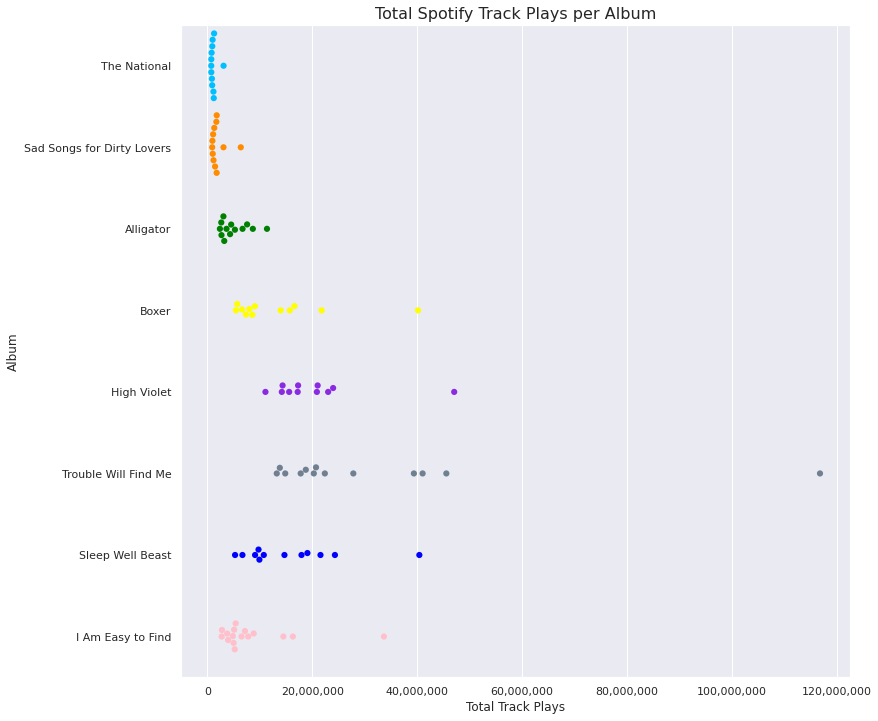

In [10]:
# Swarm Plot - Total Spotify Track Plays
sns.set()
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

swarm_plays = sns.swarmplot(data = studio_albums_df,
                            x = "plays",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette,
                            size = 6.2)

# change y ticks from scientific notation to normal notation w/ commas
xlabels = ['{:,.0f}'.format(x) for x in swarm_plays.axes.get_xticks()]
ticks_loc = swarm_plays.get_xticks().tolist()
swarm_plays.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
swarm_plays.set_xticklabels(xlabels)

swarm_plays.set_xlabel("Total Track Plays")
swarm_plays.set_ylabel("Album")
swarm_plays.set_title("Total Spotify Track Plays per Album", fontsize = 16);

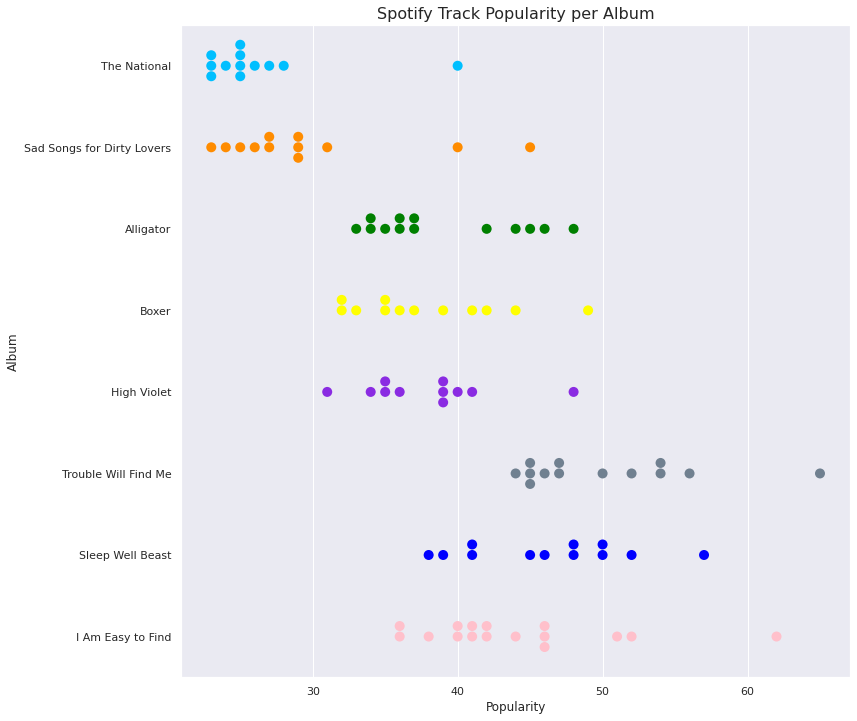

In [11]:
# Swarm Plot - Track Popularity
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

swarm_pop = sns.swarmplot(data = studio_albums_df,
                            x = "popularity",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette,
                            size = 10)

# change y ticks from scientific notation to normal notation w/ commas
xlabels = ['{:,.0f}'.format(x) for x in swarm_pop.axes.get_xticks()]
ticks_loc = swarm_pop.get_xticks().tolist()
swarm_pop.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
swarm_pop.set_xticklabels(xlabels)

swarm_pop.set_xlabel("Popularity")
swarm_pop.set_ylabel("Album")
swarm_pop.set_title("Spotify Track Popularity per Album", fontsize = 16);

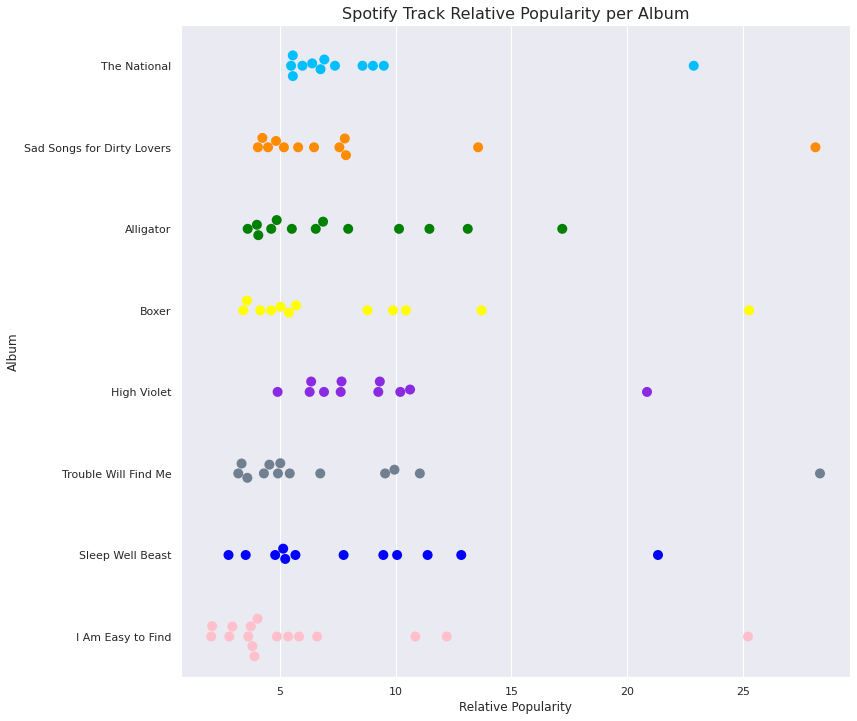

In [12]:
# Swarm Plot - Relative Track Popularity within Album
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

swarm_rel_pop = sns.swarmplot(data = studio_albums_df,
                            x = "relative plays per album",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette,
                            size = 10)

# change y ticks from scientific notation to normal notation w/ commas
xlabels = ['{:,.0f}'.format(x) for x in swarm_rel_pop.axes.get_xticks()]
ticks_loc = swarm_rel_pop.get_xticks().tolist()
swarm_rel_pop.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
swarm_rel_pop.set_xticklabels(xlabels)

swarm_rel_pop.set_xlabel("Relative Popularity")
swarm_rel_pop.set_ylabel("Album")
swarm_rel_pop.set_title("Spotify Track Relative Popularity per Album", fontsize = 16);

In [13]:
# show the tracks with the highest relative plays per album

top_tracks = studio_albums_df.sort_values("relative plays per album", ascending = False).head(8).reset_index()
top_tracks[["album", "name", "plays", "popularity", "relative plays per album"]]

,album,name,plays,popularity,relative plays per album
0,Trouble Will Find Me,I Need My Girl,116835485,65,28.319093
1,Sad Songs for Dirty Lovers,Lucky You,6372339,45,28.123083
2,Boxer,Fake Empire,40171669,49,25.260817
3,I Am Easy to Find,Light Years,33671086,62,25.211642
4,The National,Cold Girl Fever,3088937,40,22.868739
5,Sleep Well Beast,The System Only Dreams in Total Darkness,40426100,57,21.326057
6,High Violet,Bloodbuzz Ohio,47072865,48,20.852369
7,Alligator,Mr. November,11367398,48,17.193966


In [14]:
# show the tracks with the lowest relative plays per album

bottom_tracks = studio_albums_df.sort_values("relative plays per album", ascending = True)
bottom_tracks[["album", "name", "plays", "popularity", "relative plays per album"]] \
                .groupby("album") \
                .first() \
                .sort_values("relative plays per album") \
                .reset_index()

,album,name,plays,popularity,relative plays per album
0,I Am Easy to Find,Underwater,2726548,36,2.041537
1,Sleep Well Beast,Sleep Well Beast,5281317,38,2.786063
2,Trouble Will Find Me,Humiliation,13232209,45,3.207280
3,Boxer,Racing Like a Pro,5441227,32,3.421562
4,Alligator,Val Jester,2389235,33,3.613881
5,Sad Songs for Dirty Lovers,Sugar Wife,918514,23,4.053683
6,High Violet,Little Faith,11073870,31,4.905510
7,The National,Watching You Well,741234,23,5.487676


#### Duration

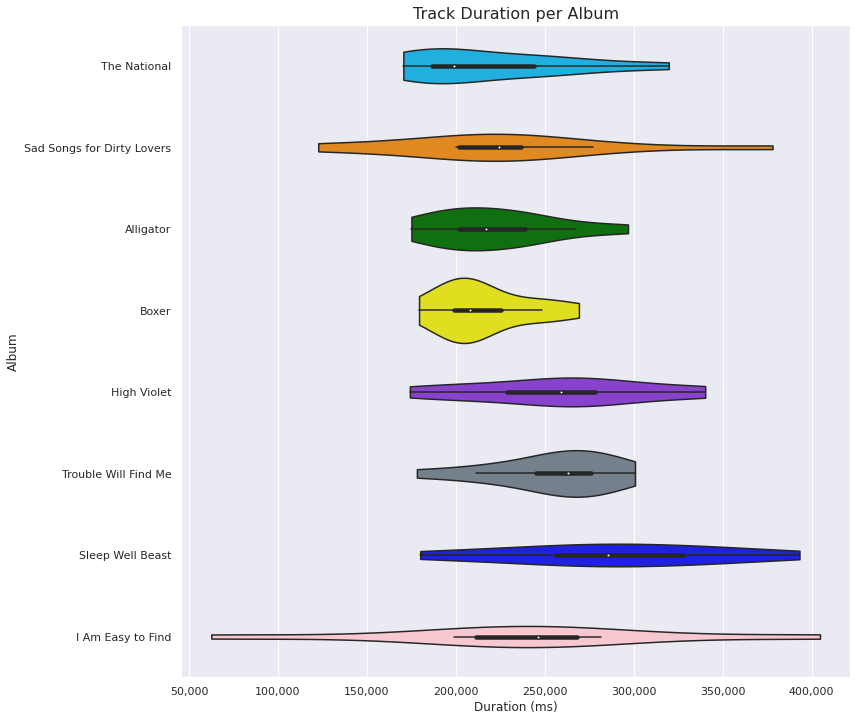

In [15]:
# Violin Plot - Track Durations of each Album
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

violin_duration = sns.violinplot(data = studio_albums_df,
                            x = "duration_ms",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette,
                            cut = 0,
                            scale = "area",
                            inner = "box")

# add commas to x ticks
xlabels = ['{:,.0f}'.format(x) for x in violin_duration.axes.get_xticks()]
ticks_loc = violin_duration.get_xticks().tolist()
violin_duration.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
violin_duration.set_xticklabels(xlabels)

violin_duration.set_xlabel("Duration (ms)")
violin_duration.set_ylabel("Album")
violin_duration.set_title("Track Duration per Album", fontsize = 16);

NameError: name 'box_duration' is not defined

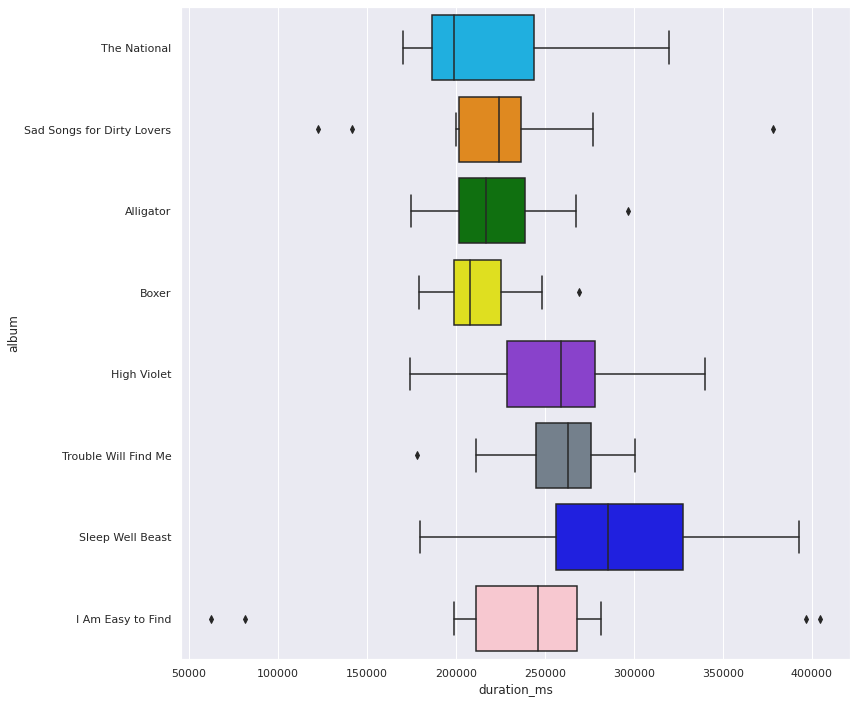

In [16]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_duration = sns.boxplot(data = studio_albums_df,
                            x = "duration_ms",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

# add commas to x ticks
xlabels = ['{:,.0f}'.format(x) for x in box_duration.axes.get_xticks()]
ticks_loc = violin_duration.get_xticks().tolist()
box_duration.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
box_duration.set_xticklabels(xlabels)

box_duration.set_xlabel("Duration (ms)")
box_duration.set_ylabel("Album")
box_duration.set_title("Track Duration per Album", fontsize = 16);

Audio Feature descriptions come from:
<https://developer.spotify.com/documentation/web-api/reference/#object-audiofeaturesobject>

#### Acousticness:

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_acousticness = sns.boxplot(data = studio_albums_df,
                            x = "acousticness",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_acousticness.set_xlabel("Acousticness")
box_acousticness.set_ylabel("Album")
box_acousticness.set_title("Audio Feature - Acousticness", fontsize = 16);

#### Danceability:

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_danceability = sns.boxplot(data = studio_albums_df,
                            x = "danceability",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_danceability.set_xlabel("Danceability")
box_danceability.set_ylabel("Album")
box_danceability.set_title("Audio Feature - Danceability", fontsize = 16);

#### Energy:

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_energy = sns.boxplot(data = studio_albums_df,
                            x = "energy",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_energy.set_xlabel("Energy")
box_energy.set_ylabel("Album")
box_energy.set_title("Audio Feature - Energy", fontsize = 16);

#### Instrumentalness:

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_instrumentalness = sns.boxplot(data = studio_albums_df,
                            x = "instrumentalness",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_instrumentalness.set_xlabel("Instrumentalness")
box_instrumentalness.set_ylabel("Album")
box_instrumentalness.set_title("Audio Feature - Instrumentalness", fontsize = 16);

#### Liveness:

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_liveness = sns.boxplot(data = studio_albums_df,
                            x = "liveness",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_liveness.set_xlabel("Liveness")
box_liveness.set_ylabel("Album")
box_liveness.set_title("Audio Feature - Liveness", fontsize = 16);

### Loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_loudness = sns.boxplot(data = studio_albums_df,
                            x = "loudness",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_loudness.set_xlabel("Loudness (dB)")
box_loudness.set_ylabel("Album")
box_loudness.set_title("Audio Feature - Loudness", fontsize = 16);

#### Speechiness:

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_speechiness = sns.boxplot(data = studio_albums_df,
                            x = "speechiness",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_speechiness.set_xlabel("Speechiness")
box_speechiness.set_ylabel("Album")
box_speechiness.set_title("Audio Feature - Speechiness", fontsize = 16);

#### Tempo: 

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_tempo = sns.boxplot(data = studio_albums_df,
                            x = "tempo",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_tempo.set_xlabel("Tempo")
box_tempo.set_ylabel("Album")
box_tempo.set_title("Audio Feature - Tempo", fontsize = 16);

#### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [ ]:
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (12,12))

box_valence = sns.boxplot(data = studio_albums_df,
                            x = "valence",
                            y = "album",
                            order = studio_albums,
                            palette = album_palette)

box_valence.set_xlabel("Valence")
box_valence.set_ylabel("Album")
box_valence.set_title("Audio Feature - Valence", fontsize = 16);

### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
x = studio_albums_df[x_feat]
y = studio_albums_df['album']

x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC1', 
                                      'PC2',
                                      'PC3'])

In [ ]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [ ]:
finalDf

In [ ]:
sns.set(style = "white")

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_zlabel('Principal Component 3', fontsize = 12)
ax.set_title('Principal Component Analysis', fontsize = 20)

for album, color in album_palette.items():
    album_index = finalDf['album'] == album
    ax.scatter(finalDf.loc[album_index, 'PC1'],
               finalDf.loc[album_index, 'PC2'],
               finalDf.loc[album_index, 'PC3'],
               c = color,
               s = 60,
               alpha = 0.7)
    
ax.legend(studio_albums);

In [ ]:
sns.set()
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

TO DO:

1. Tree Map
2. Heat Map
3. Plotly